# 1. Define the Problem

There are a lot of factors that determine the price of a house including its location, size, number of rooms, etc.
But people ignore many of these factors while buying or selling a house.
That’s where this project comes in! It provides many factors for the house like its frontage, area, street, land contour, utilities, proximity, garage quality, roof materials, etc. with the ultimate aim of predicting the final price of the house based on these factors.

# 2. Data Exploration

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

![image.png](\int254DataExploration.png)

we will load the data, review the column names

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:

# Count missing values in each column
missing_counts = train_df.isna().sum()

print("Missing Value Counts for Each Column:")

# Calculate total missing values
total_missing = missing_counts.sum()

# Calculate total number of values in the dataset
total_values = train_df.size

print("Total Missing Values:", total_missing)
print("Total Number of Values in Dataset:", total_values)

Missing Value Counts for Each Column:
Total Missing Values: 6965
Total Number of Values in Dataset: 118260


In [7]:
pd.set_option('display.max_columns', None)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Right from the start we have a good idea of what we are working with. There is a healthy mix of description variables, discrete, and continuous variables. We will need to feature engineer those descriptions later. But for now, we can work with our discrete and continuous variables to extract any more data. Also of note, there are quite a few columns missing data, which we will have to sort out later.

In [8]:
train_df = train_df.drop('Id', axis=1)

<Figure size 720x576 with 0 Axes>

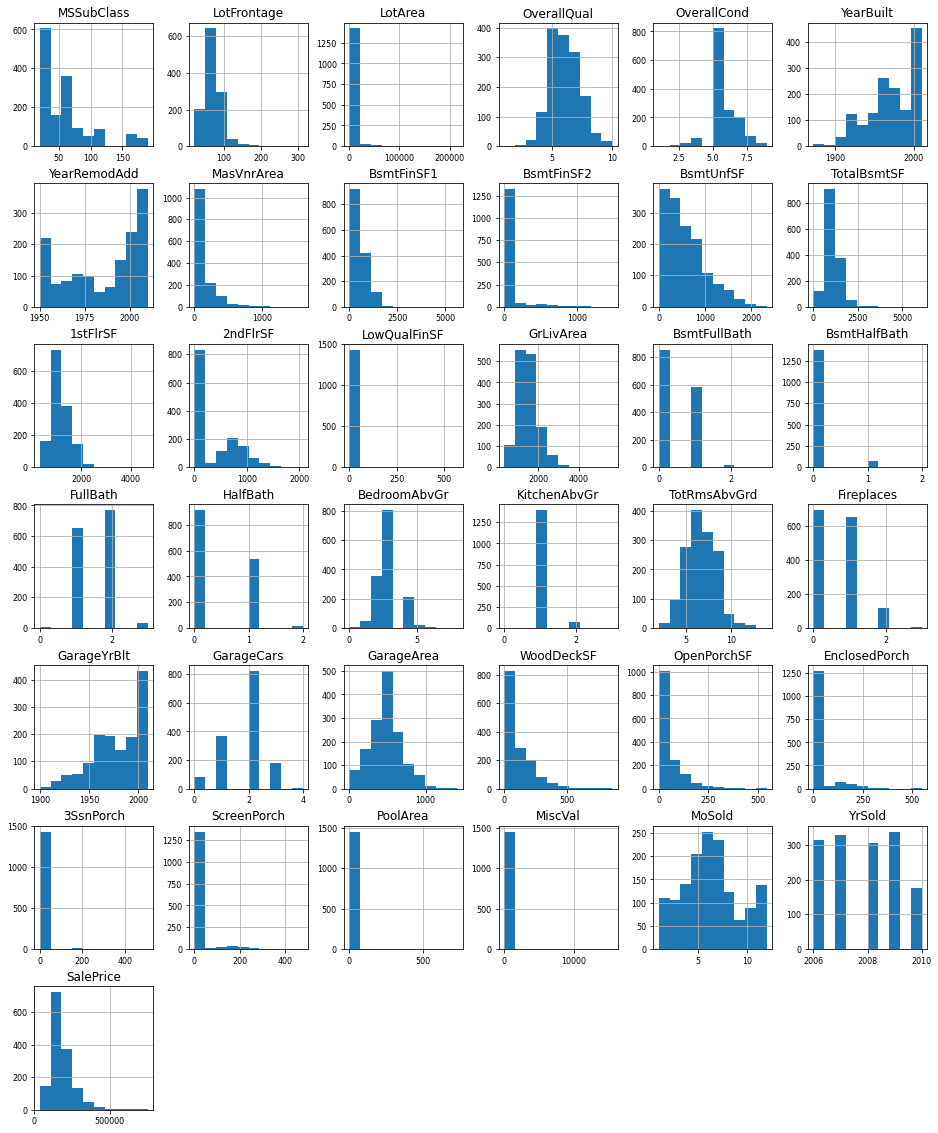

In [9]:
plt.figure(figsize=(10,8))

df_num = train_df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

plt.show()

Above we get a general idea of the distribution of our numerical values. Some of these plots are zoomed too far out to be useful, but for the most part, these graphs can give us a good idea of what we are working with. Now, let's jump into some correlation plots, as these will be important for predicting continuous variables.

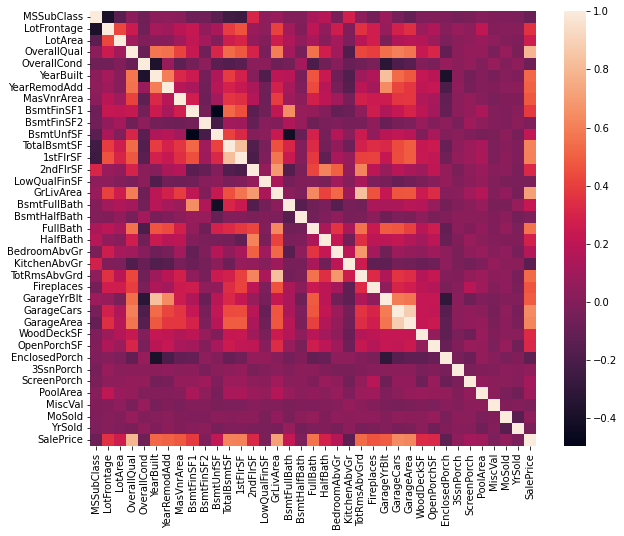

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr())

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Again, a very high level view of the correlation between all variables. This can be helpful for getting a big picture, but we need to start rooting down into the details. 

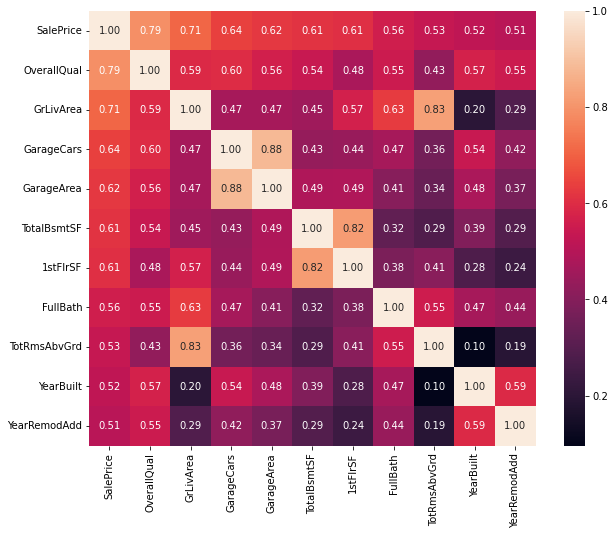

In [11]:
corr = df_num.corr()
abs_corr = corr.abs()
sorted_corr = abs_corr['SalePrice'].sort_values(ascending=False)
top_x_vars = sorted_corr[:11].index 
top_x_corr = df_num[top_x_vars].corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(top_x_corr, annot=True, fmt=".2f")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

The above code does just that. We sort our variables based on those that have the highest correlation with our prediction variable, which is Sales Price of the home . 

Here's what we found. 

1. Overall Quality - A 10-1 value where 10 is Very Excellent and 1 is Very Poor. 
2. Above Ground Living Area - Given in square footage. 
3. Size of Garage - Given how many cars the garage can hold. 
4. Size of Garage - Given in square footage. 
5. Basement Area - Given in square footage.
6. First Floor Area - Given in square footage. 
7. Above Ground Full Bathrooms - The number of full bathrooms. 
8. Total Rooms - Total above ground rooms (not including bathrooms). 
9. Year Built - Original construction date. 
10. Year Remodeled - The year the home was remodeled. This does not specify if it is the most recent remodel, but the year will be the same as the built date if the home was never remodeled. 

The above variables make a lot of sense. They have to do with square footage, rooms, bathrooms, garages, and year built, which all makes intuitive sense. These are the main factors one would consider if they had to price a home themselves.

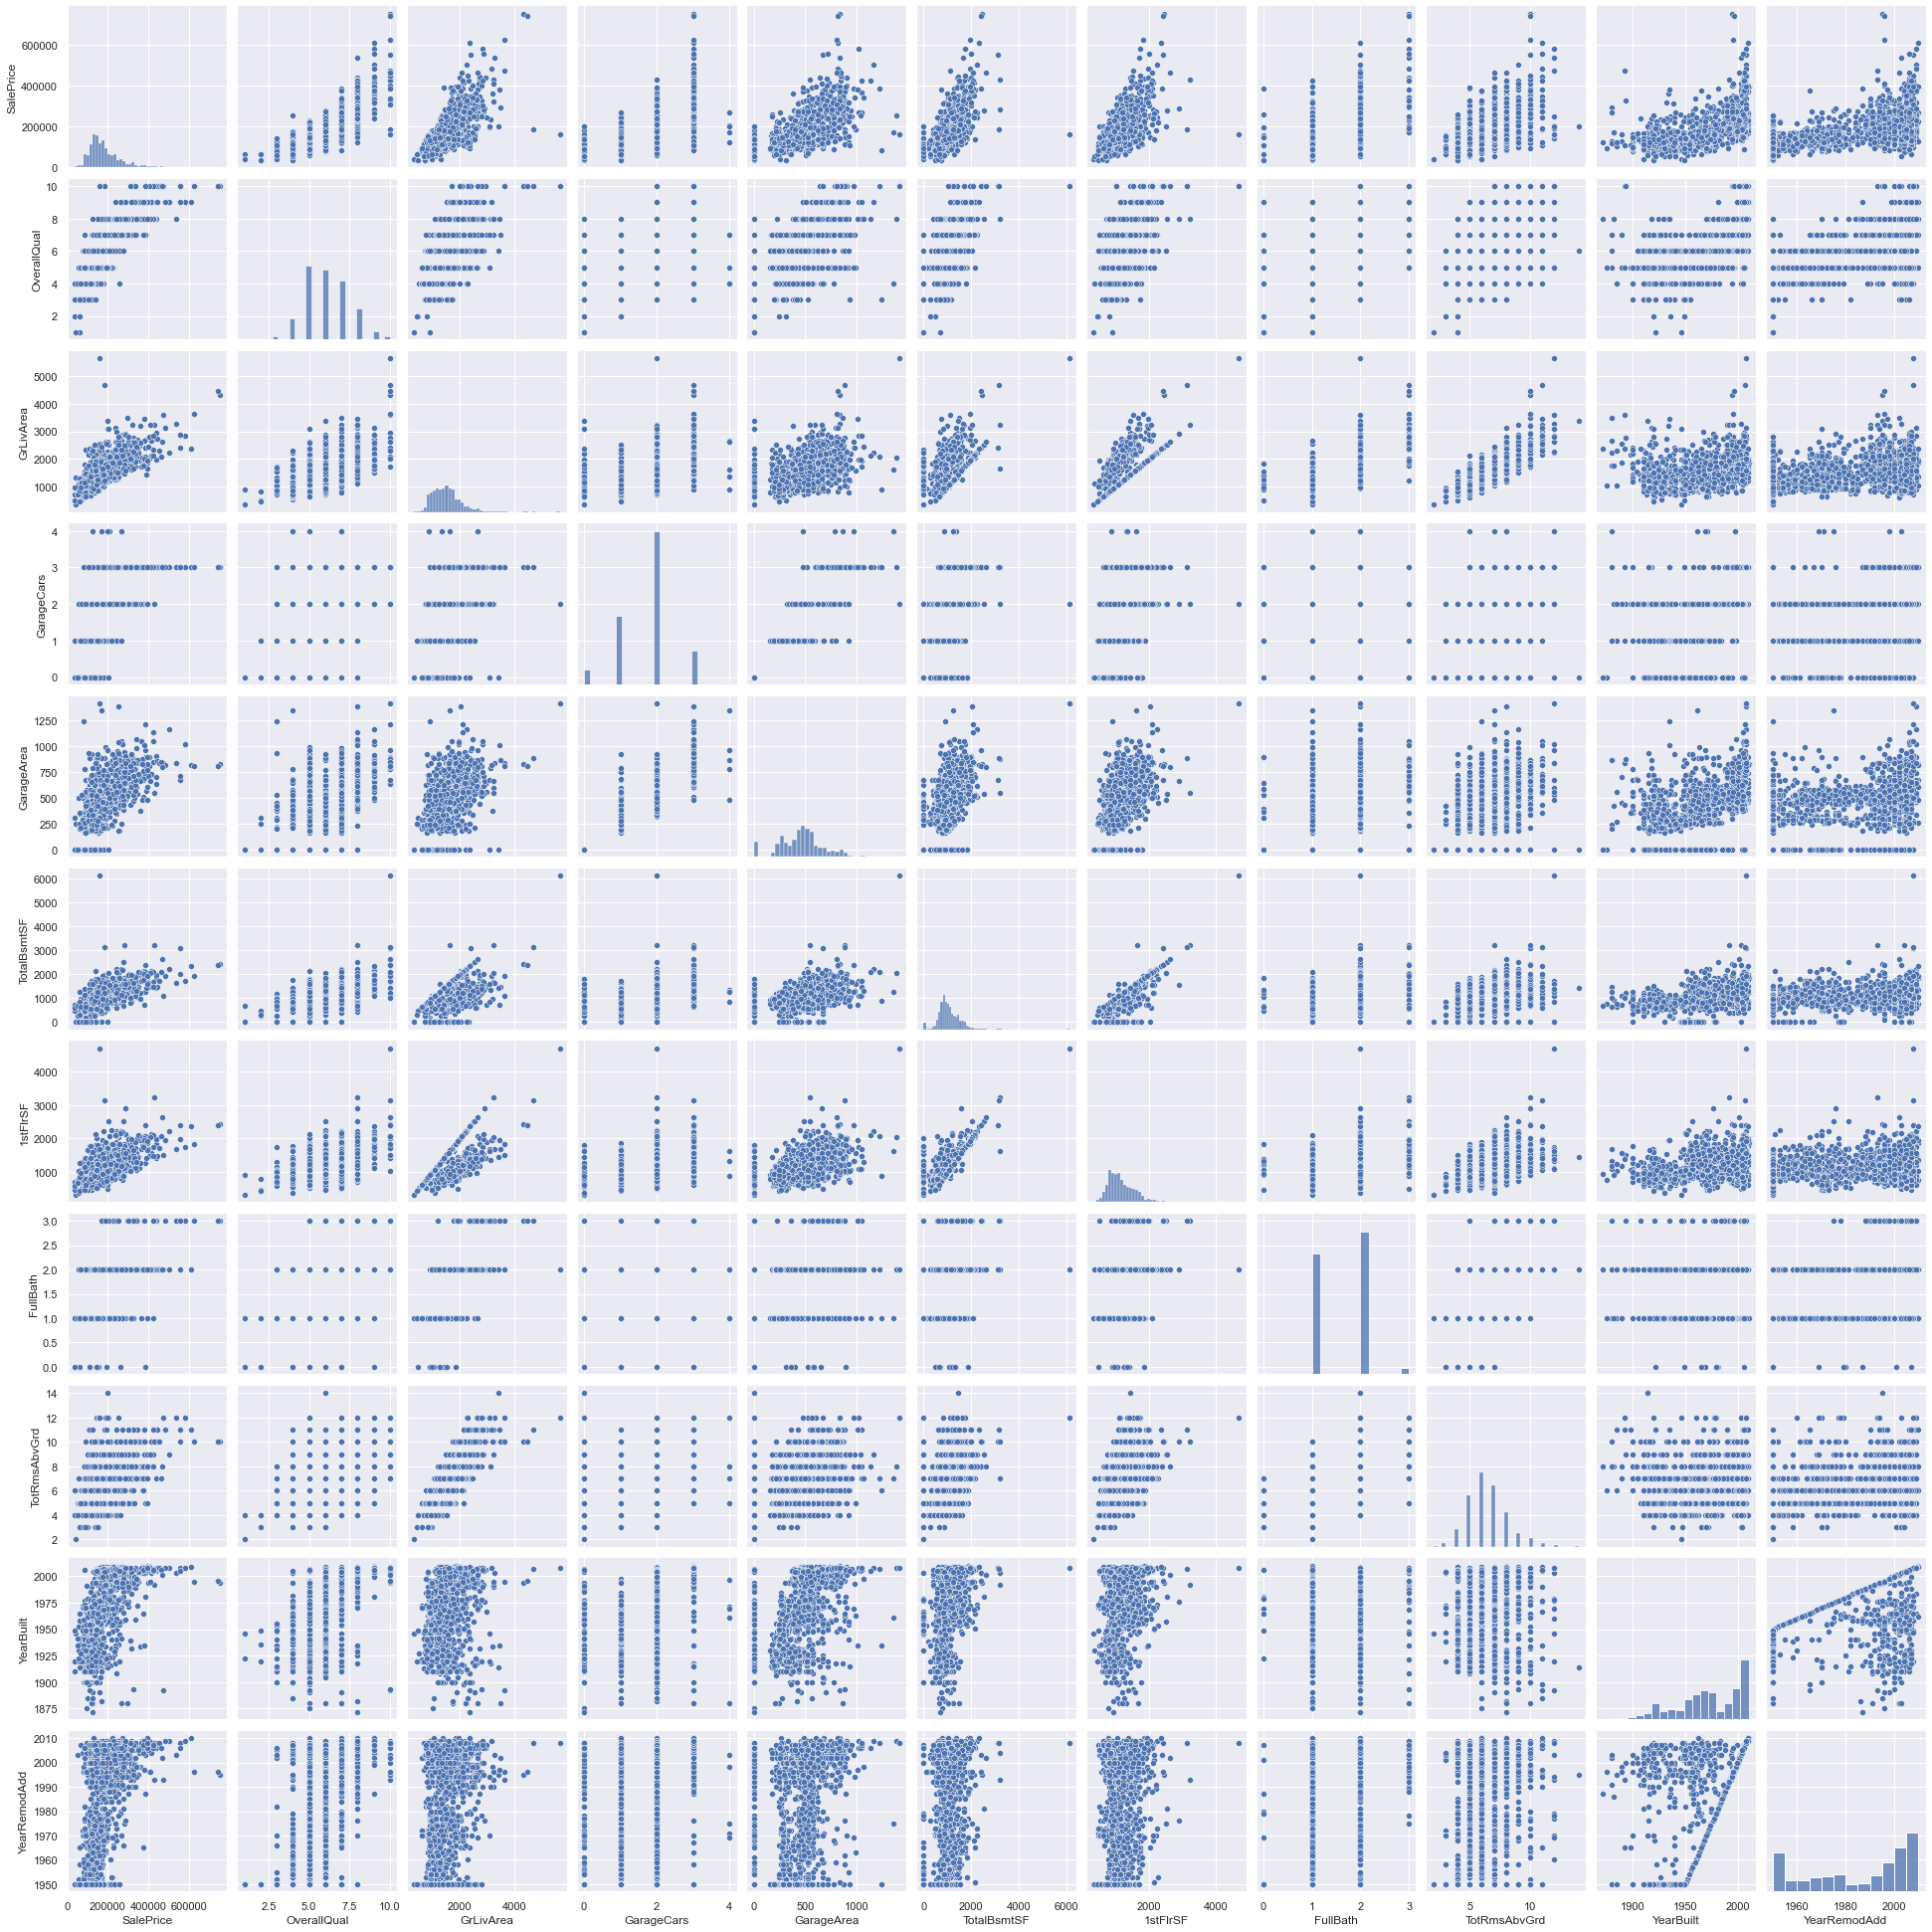

In [12]:
sns.set()
sns.pairplot(df_num[top_x_vars])
plt.show()

# 3. Different Model Selection

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

In [14]:
df_num_y = df_num['SalePrice']
df_num_x = df_num.drop(columns=['SalePrice'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_num_x, df_num_y, test_size=0.2, random_state=61)

# Decision Tree

Decision tree regression is a machine learning technique used for regression tasks, where the goal is to predict a continuous target variable based on the values of one or more input features.

R2 Score: 0.7703605557097298


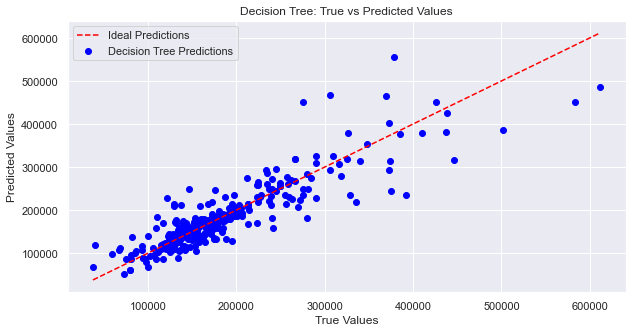

In [16]:
# Create a Decision Tree regressor instance
reg = DecisionTreeRegressor(random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the regressor
reg.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test_imputed)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Visualize Decision Tree predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Decision Tree Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Random Forest

Random Forest is an ensemble learning method used for both classification and regression tasks. It constructs a multitude of decision trees during training and outputs the mean prediction of the individual trees for regression tasks.

R2 Score: 0.8693725371110954


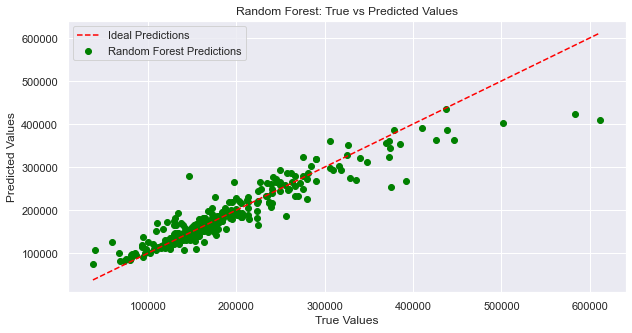

In [21]:
import matplotlib.pyplot as plt

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a Random Forest regressor instance
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_reg.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = rf_reg.predict(X_test_imputed)

# Calculate R2 score
r2_rf = r2_score(y_test, y_pred)
print("R2 Score:", r2_rf)

# Visualize Random Forest predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='green', label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# XGBoost 

XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting, a popular machine learning technique used for regression and classification tasks.

R2 Score (XGBoost): 0.8583367262190025


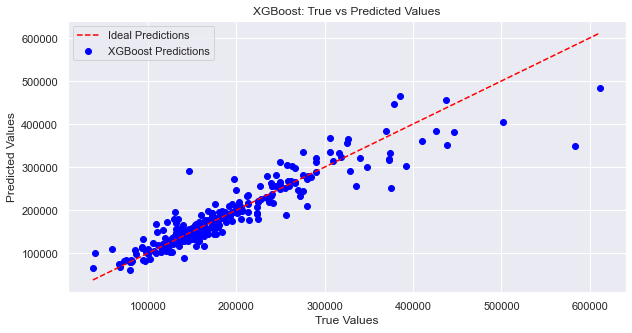

In [18]:
# Train the XGBoost regressor
xgbc = xgb.XGBRegressor()
xgbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgbc.predict(X_test)

# Calculate R2 score
r2_xgb = r2_score(y_test, y_pred_xgb)
print("R2 Score (XGBoost):", r2_xgb)

# Visualize XGBoost predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_xgb, color='blue', label='XGBoost Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost: True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Comparison
The Random Forest model achieved the highest R2 score, indicating the best performance in capturing the variance in the target variable.
XGBoost closely follows Random Forest in performance, demonstrating its effectiveness in regression tasks.
The Decision Tree model lags behind the ensemble methods in terms of R2 score, suggesting it may not generalize as well due to overfitting.
Overall, ensemble methods like Random Forest and XGBoost tend to outperform individual decision trees in regression tasks due to their ability to mitigate overfitting and capture complex relationships in the data. However, the choice of model ultimately depends on factors such as interpretability, computational resources, and the specific requirements of the problem at hand

# XGBoost Regression Model
R2 Score: 0.8583
Reasoning: XGBoost is an ensemble learning method that combines multiple weak learners to create a strong learner. It's known for its high performance and accuracy in regression tasks. The high R2 score indicates that the XGBoost model captures a significant amount of variance in the target variable. This is likely due to its ability to handle complex relationships in the data and mitigate overfitting through techniques like regularization.
# Random Forest Regression Model
R2 Score: 0.8694
Reasoning: Random Forest is another ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy. Like XGBoost, Random Forest is robust to overfitting and performs well in capturing nonlinear relationships in the data. The slightly higher R2 score compared to XGBoost may be due to the randomness in feature selection and the averaging of multiple trees, which helps to reduce variance and improve generalization.
# Decision Tree Regression Model
R2 Score: 0.7704
Reasoning: Decision trees are simple yet powerful models that partition the feature space into regions and make predictions based on the average target value of instances in each region. While decision trees are intuitive and easy to interpret, they often suffer from overfitting, especially when the tree depth is not constrained. The lower R2 score compared to ensemble methods like XGBoost and Random Forest may indicate that the decision tree model is overfitting to the training data and lacks the ability to generalize well to unseen data.